In [1]:
%load_ext autoreload
%autoreload 2
from modules import read_and_write
from modules import polyakov
from modules import utility
from modules import fourier_surface
from modules import surface_amplitudes as sf
from modules import globals
import pandas as pd
import numpy as np
import os
import glob
indices = None
surface_tension_dict = {}

For reference with integration method the following surface tensions were computed

$z_1$: $\alpha_{o-o} / T^3(\beta=10.85) = 1.2316804724774406$

$z_2$: $\alpha_{o-o} / T^3(\beta=10.85) = 1.5433288477348852$

# Load data

In [2]:
folders = utility.list_all_folders(globals.data_path,"surface")
print(len(folders[55]))

../data/output-measure-surface/amplitude-test , index: 0
../data/output-measure-surface/amplitude-test/beta-10.85-twist-1-44-44-64-6 , index: 1
../data/output-measure-surface/amplitude-test/beta-10.85-twist-2-44-44-64-6 , index: 2
../data/output-measure-surface/amplitude-test/beta-12.977777777777778-twist-1-44-44-64-6 , index: 3
../data/output-measure-surface/amplitude-test/beta-12.977777777777778-twist-2-44-44-64-6 , index: 4
../data/output-measure-surface/amplitude-test/beta-15.105555555555554-twist-1-44-44-64-6 , index: 5
../data/output-measure-surface/amplitude-test/beta-15.105555555555554-twist-2-44-44-64-6 , index: 6
../data/output-measure-surface/amplitude-test/beta-17.233333333333334-twist-1-44-44-64-6 , index: 7
../data/output-measure-surface/amplitude-test/beta-17.233333333333334-twist-2-44-44-64-6 , index: 8
../data/output-measure-surface/amplitude-test/beta-19.36111111111111-twist-1-44-44-64-6 , index: 9
../data/output-measure-surface/amplitude-test/beta-19.36111111111111-t

In [3]:
choose_folder = 51
fourier_profiles = {}
folder = folders[choose_folder]
files = glob.glob(os.path.join(folder, "fourier_profile_*"))
for file in files:
    file_name = file.split("/")[-1]
    smearing_level = file_name.split("_")[-1]
    volume, modes, fourier_profile = read_and_write.read_fourier_profile(folder,file_name=file_name)
    fourier_profiles[smearing_level] = fourier_profile
fourier_profiles = dict(sorted(fourier_profiles.items(), key=lambda item: int(item[0])))
#utility.display_markdown_title(folder)

## Perform post processing

In [7]:
f_n_list = []
errors_list = []
for smearing_level, profile in fourier_profiles.items():
    if indices is not None:
        sample_size = len(profile)
        indices_set = indices[smearing_level]
        profile = np.delete(profile, list(indices_set), axis=0)
        print(f"Dropped {sample_size-len(profile)} samples")
    f_n, errors = utility.compute_with_aa_jackknife_fourier(profile, 10, thermalization=1000)
    f_n_list.append(f_n)
    errors_list.append(errors)



## Plot Fourier modes for different smearing steps

['..', 'data', 'output-measure-surface', 'test-muca', 'beta-10.8053-twist-1-30-30-48-6-merged']


|   smearing | Linear fit ($\sigma / T^3$)   |
|-----------:|:------------------------------|
|          0 | 589.2 $\pm$ 1.063e+04         |
|          2 | 2.167 $\pm$ 0.9373            |
|          5 | 0.8818 $\pm$ 0.1481           |
|         10 | 0.6442 $\pm$ 0.1354           |
|         20 | 0.5578 $\pm$ 0.1281           |
|         30 | 0.6686 $\pm$ 0.06373          |

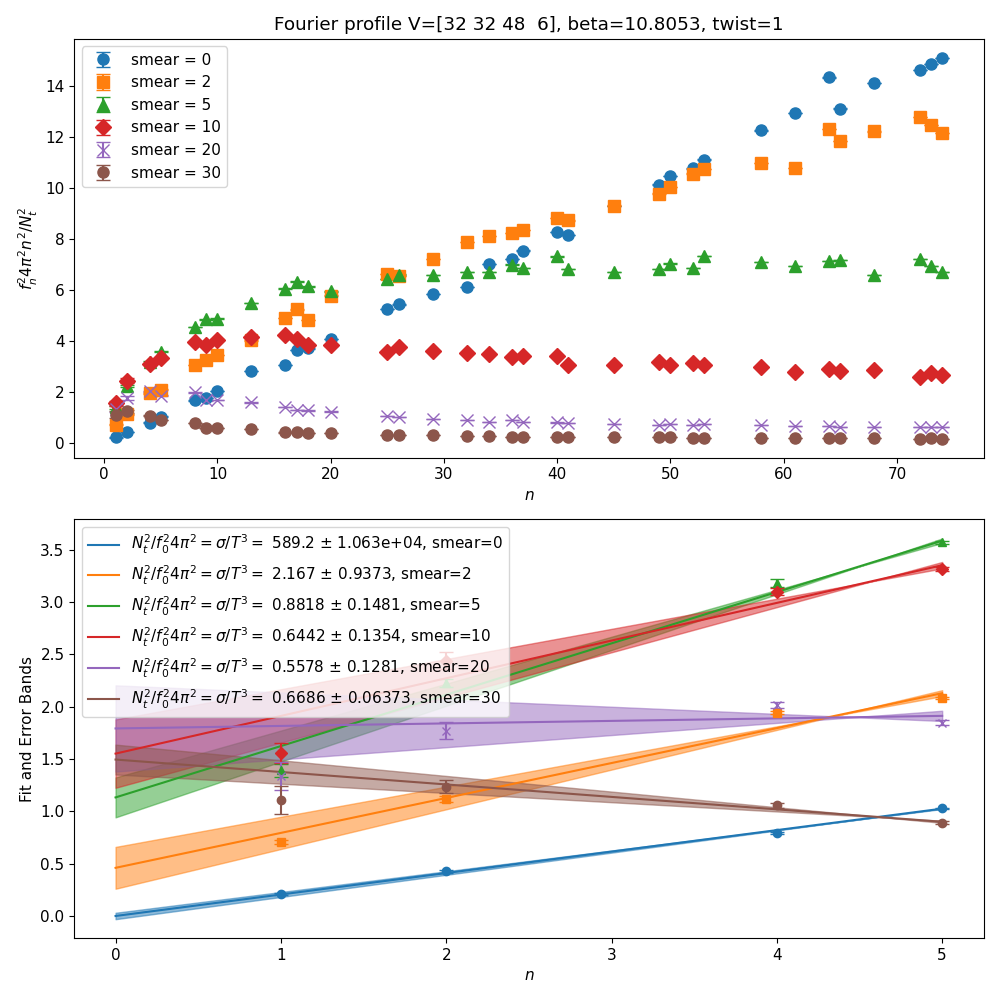

In [9]:
%matplotlib widget
smearing_levels = list(fourier_profiles.keys())
show_plot = True
print(folder.split("/"))
twist = folder.split("/")[4].split('-')[3]
temp = folder.split("/")[4].split('-')[1]
data = {
    "smearing": smearing_levels,
    "linear": [
        fourier_surface.compute_fourier_profile(
            modes, f_n, volume, errors=error, beta=temp, twist=twist, fit_range=4, smearing=smear, show_plot=show_plot
        ) for f_n, error, smear in zip( f_n_list, errors_list, smearing_levels)
    ]
    # "exponential": [
    #     fourier_surface.compute_fourier_profile_exponential_fit(
    #         n_2, f_n, volume, errors=error, beta=10.85, smearing=smear, show_plot=show_plot
    #     ) for n_2, f_n, error, smear in zip(n_2_list, f_n_list, errors_list, smearing_levels)
    # ]
}
surface_tension_dict[folder.split("/")[-1]] = data
df = pd.DataFrame(data)
utility.print_df_as_markdown_fourier_modes(df)
fourier_surface.global_fig = None

In [10]:
surface_tension_dict.keys()

dict_keys(['beta-50-twist-1-20-20-60-6', 'beta-50-twist-2-20-20-60-6'])

In [9]:
read_and_write.write_surface_tension_dict(surface_tension_dict,file_path="./Results/Surface_tension_smeared/Surface_tension_smeared_test_big_beta.txt")

In [18]:
surface_tension_dict

{'beta-10.95-twist-1-60-60-86-6': {'smearing': ['10',
   '20',
   '30',
   '40',
   '50',
   '60'],
  'linear': [(1.755111157717984, 0.18016991115469236),
   (1.891220209359604, 0.01979572968924086),
   (2.00198694809383, 0.0586452143449832),
   (2.056175739393132, 0.07932209090196134),
   (2.0853558745564684, 0.08175262257911918),
   (2.1205087038831945, 0.08723723790189258)]},
 'beta-10.95-twist-2-60-60-86-6': {'smearing': ['10',
   '20',
   '30',
   '40',
   '50',
   '60'],
  'linear': [(2.5105378768958904, 0.09495689813576706),
   (2.519419939705219, 0.09911655062819565),
   (2.5632899389557995, 0.10850698489718548),
   (2.624832302250134, 0.12392647448216107),
   (2.7045636014144616, 0.14445424137200658),
   (2.8039320454002947, 0.17022784536651372)]},
 'beta-12-twist-1-60-60-86-6': {'smearing': ['10',
   '20',
   '30',
   '40',
   '50',
   '60'],
  'linear': [(5.034688469066288, 0.28647121128372993),
   (5.081331459494983, 0.21561405484852175),
   (5.139681062581598, 0.1831560063